In [ ]:
import numpy as np
import pandas as pd
import boto3
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD


In [ ]:
df_track = pd.read_csv('features_spot.csv', index_col=0)

In [ ]:
print(df_track.shape)
df_track.head()

(1145, 389)


,id,name,artist,artist id,playlist id,danceability,energy,key,loudness,mode,...,underground rap,vapor pop,vapor soul,vapor twitch,vaporwave,vienna indie,viral rap,vocal house,wave,wonky
0,0afGLa6wcYiLLXFZ48ZQpY,Thunder,Roy Blair,6Sa4YbwEdGlfVSJMF1Lp67,søndag,0.667,0.316,0,-9.132,1,...,0,0,0,0,0,0,0,0,0,0
1,3LH6EfPCeySeuymuK2gWAO,Bedroom,Litany,2z6JjrrJKNLilqlx8mlxcc,søndag,0.692,0.452,6,-8.180,1,...,0,0,0,0,0,0,0,0,0,0
2,0bonUwkDjTgQ8URsgCcHhH,Cherry Blossom,Raury,2PU4qFehXQF7WnlFsJpBiJ,søndag,0.805,0.176,7,-20.783,1,...,0,0,0,0,0,0,0,0,0,0
3,3rxYhGVE6GHQyAy4CdGfq1,Pink & Blue (RAC Mix),Tycho,5oOhM2DFWab8XhSdQiITry,søndag,0.671,0.721,5,-7.378,1,...,0,0,0,0,0,0,0,0,0,0
4,2H7Nwzydg8ZusjdWkYqsHy,Redstripe Rhapsody,LAUSSE THE CAT,2Zv7tySETckaR2robozkcz,søndag,0.633,0.326,4,-15.050,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
to_drop = ['id', 'uri', 'track_href', 'analysis_url', 'type']
df_track = df_track.drop(to_drop, axis=1)

In [ ]:
print(df_track.shape)
df_track.head()

(1145, 384)


,name,artist,artist id,playlist id,danceability,energy,key,loudness,mode,speechiness,...,underground rap,vapor pop,vapor soul,vapor twitch,vaporwave,vienna indie,viral rap,vocal house,wave,wonky
0,Thunder,Roy Blair,6Sa4YbwEdGlfVSJMF1Lp67,søndag,0.667,0.316,0,-9.132,1,0.0262,...,0,0,0,0,0,0,0,0,0,0
1,Bedroom,Litany,2z6JjrrJKNLilqlx8mlxcc,søndag,0.692,0.452,6,-8.180,1,0.1160,...,0,0,0,0,0,0,0,0,0,0
2,Cherry Blossom,Raury,2PU4qFehXQF7WnlFsJpBiJ,søndag,0.805,0.176,7,-20.783,1,0.0617,...,0,0,0,0,0,0,0,0,0,0
3,Pink & Blue (RAC Mix),Tycho,5oOhM2DFWab8XhSdQiITry,søndag,0.671,0.721,5,-7.378,1,0.0384,...,0,0,0,0,0,0,0,0,0,0
4,Redstripe Rhapsody,LAUSSE THE CAT,2Zv7tySETckaR2robozkcz,søndag,0.633,0.326,4,-15.050,0,0.3260,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_track = df_track[(df_track['playlist id'] != '3 x 5') & (df_track['playlist id'] != 'Loss for words')]
df_track = df_track.reset_index(drop=True)

In [ ]:
# profile = ProfileReport(df_track, title="Pandas Profiling Report")
# profile.to_file("profile.html")

In [ ]:
# Could perform a tf-idf type transformation here, prior to PCA:

In [ ]:
gen_list = df_track.iloc[:, 17:].columns

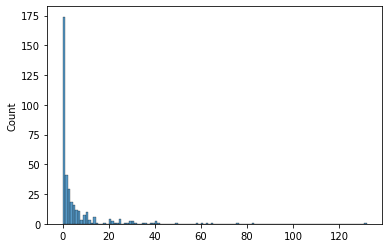

In [ ]:
sns.histplot(df_track[gen_list].sum())
plt.show()

In [ ]:
c = 0.0000001
df_track[['speechiness', 'acousticness', 'instrumentalness']] = df_track[['speechiness', 'acousticness', 'instrumentalness']] + c
df_track[['speechiness', 'acousticness', 'instrumentalness']] = np.log(df_track[['speechiness', 'acousticness', 'instrumentalness']])

In [ ]:
df_track = pd.get_dummies(df_track, prefix=['key', 'time_signature'], columns=['key', 'time_signature'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_track.drop('playlist id', axis=1), df_track['playlist id'], test_size=0.2, random_state=2021)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [ ]:
X_train.head()

,name,artist,artist id,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,circle the drain,Soccer Mommy,4wXchxfTTggLtzkoUhO86Q,0.482,0.790,-5.221,1,-3.270166,-1.194022,-8.180364,...,0,0,0,1,0,0,0,0,1,0
1,Sloucho Darx,Hermitude,3fmMaLC5jjf2N4EC2kTx0u,0.499,0.708,-4.844,0,-1.609437,-3.897129,-2.447610,...,0,0,0,0,0,0,0,0,1,0
2,By Design,Kid Cudi,0fA0VVWsXO9YnASrzqfmYu,0.756,0.850,-5.885,0,-2.922480,-2.884189,-7.119588,...,0,0,0,1,0,0,0,0,1,0
3,All I Want,Bob Moses,6LHsnRBUYhFyt01PdKXAF5,0.691,0.514,-10.962,1,-3.390254,-2.928072,-0.306525,...,0,0,1,0,0,0,0,0,1,0
4,The Power,David Penn,5kA0fIY29Fnfu4U2I2xvki,0.793,0.847,-6.250,1,-2.189256,-7.992169,-5.521436,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
scale_col = ['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']

scaler = StandardScaler()
X_train[scale_col] = scaler.fit_transform(X_train[scale_col])

In [ ]:
svd = TruncatedSVD(random_state=2021, n_components=100)
gen_svd = svd.fit_transform(X_train[gen_list])

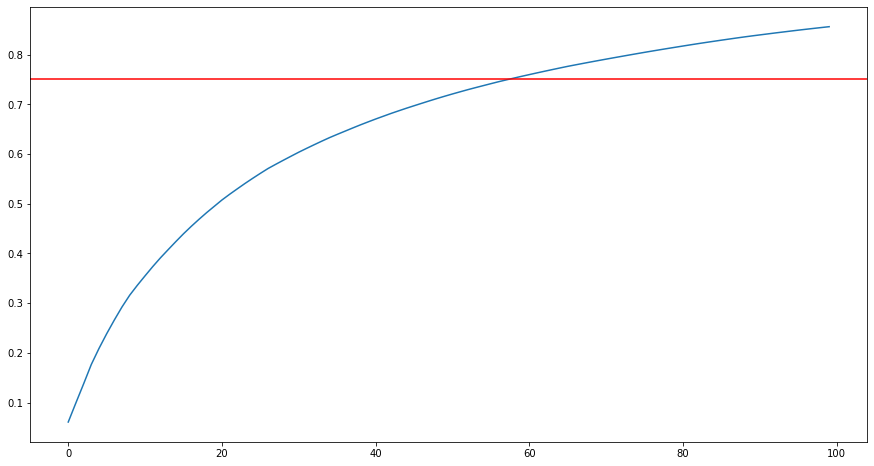

In [ ]:
plt.figure(figsize=(15,8))
exp_var = pd.Series(svd.explained_variance_ratio_).cumsum() 
exp_var.plot()
plt.axhline(0.75, color='r')
plt.show()

In [ ]:
# exp_var[exp_var > 0.75]

In [ ]:
svd = TruncatedSVD(random_state=2021, n_components=60)
gen_svd = svd.fit_transform(X_train[gen_list])

In [ ]:
gen_trans = pd.DataFrame(gen_svd)
gen_trans = gen_trans.add_prefix('genre_')
gen_trans.head()

,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,...,genre_50,genre_51,genre_52,genre_53,genre_54,genre_55,genre_56,genre_57,genre_58,genre_59
0,0.063508,1.083273,-0.748676,-0.485606,-0.061776,-0.408454,0.094305,-0.252227,-0.079287,0.085599,...,-0.007424,-0.021430,-0.044113,-0.007046,-0.103647,-0.091060,0.027447,-0.002688,0.003862,-0.007088
1,0.006880,0.205253,0.762671,-0.745737,0.473604,0.146532,-0.014598,-0.044020,0.035702,-0.155023,...,-0.044641,-0.104946,0.056381,0.026239,-0.003167,-0.003228,-0.011875,-0.023324,-0.026099,-0.018250
2,0.911947,-0.136742,-0.002157,-0.054787,-0.006453,-0.011718,0.437532,0.079802,-0.450629,0.009352,...,-0.018847,0.025126,-0.000833,-0.091732,-0.066747,0.032342,-0.100190,0.017475,0.046306,-0.004331
3,0.000088,0.004149,0.020204,-0.020883,-0.006804,0.009277,-0.000792,-0.004380,0.001742,-0.012507,...,-0.012545,0.034317,-0.026146,-0.008920,0.040811,-0.055251,-0.059067,-0.051321,0.051502,-0.033255
4,0.003833,0.094938,0.233841,-0.069253,-0.087855,-0.223255,0.026443,0.307765,0.078980,-0.120371,...,-0.186482,-0.456285,0.254214,0.044887,0.021306,-0.050644,-0.134322,0.413853,-0.140042,0.120694


In [ ]:
X_train = X_train.drop(gen_list, axis=1)

In [ ]:
X_train = pd.concat([X_train, gen_trans], axis=1)

In [ ]:
X_train

,name,artist,artist id,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,genre_50,genre_51,genre_52,genre_53,genre_54,genre_55,genre_56,genre_57,genre_58,genre_59
0,circle the drain,Soccer Mommy,4wXchxfTTggLtzkoUhO86Q,-1.351662,0.986762,1.119079,1,-0.852934,0.801372,-0.377142,...,-0.007424,-0.021430,-0.044113,-0.007046,-0.103647,-0.091060,0.027447,-0.002688,0.003862,-0.007088
1,Sloucho Darx,Hermitude,3fmMaLC5jjf2N4EC2kTx0u,-1.230597,0.514922,1.252056,0,1.142470,-0.433866,0.595503,...,-0.044641,-0.104946,0.056381,0.026239,-0.003167,-0.003228,-0.011875,-0.023324,-0.026099,-0.018250
2,By Design,Kid Cudi,0fA0VVWsXO9YnASrzqfmYu,0.599616,1.332010,0.884869,0,-0.435181,0.029017,-0.197166,...,-0.018847,0.025126,-0.000833,-0.091732,-0.066747,0.032342,-0.100190,0.017475,0.046306,-0.004331
3,All I Want,Bob Moses,6LHsnRBUYhFyt01PdKXAF5,0.136722,-0.601381,-0.905918,1,-0.997222,0.008964,0.958769,...,-0.012545,0.034317,-0.026146,-0.008920,0.040811,-0.055251,-0.059067,-0.051321,0.051502,-0.033255
4,The Power,David Penn,5kA0fIY29Fnfu4U2I2xvki,0.863110,1.314748,0.756124,1,0.445805,-2.305175,0.073984,...,-0.186482,-0.456285,0.254214,0.044887,0.021306,-0.050644,-0.134322,0.413853,-0.140042,0.120694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,Breezeblocks - Tinlicker Remix,alt-J,3XHO7cRUPCLOr6jwp8vsx5,-0.732095,1.544913,0.676056,0,-0.907926,-1.451391,0.543859,...,0.070219,0.000159,-0.039563,0.024075,-0.018730,0.025944,-0.007012,-0.030027,-0.013659,0.043020
827,Waves,Joey Bada$$,2P5sC9cVZDToPxyomzF1UH,-0.575424,1.573684,0.804095,0,1.601278,0.268458,-1.723894,...,-0.001847,-0.001612,0.008226,0.000798,-0.009843,0.005586,-0.024426,-0.003485,0.014264,-0.053822
828,Changes,Antonio Williams,4OdKVXxhqKvBH0rNyv5hn0,0.314758,0.451627,-0.005410,1,-1.313528,-0.833836,0.681976,...,-0.000806,0.001479,0.016147,-0.010082,-0.038194,-0.016089,0.042712,-0.067355,-0.115304,0.060024
829,No Regrets,Baltra,2tEyBfwGBfQgLXeAJW0MgC,1.283275,0.422856,-0.563068,1,1.568016,-0.270877,0.991575,...,-0.062692,-0.112476,0.054110,0.068995,-0.012354,0.005322,-0.141333,0.469008,-0.248399,0.215294


In [ ]:
# X_train.isna().any().sum()

In [ ]:
# profile = ProfileReport(X_train, title="Pandas Profiling Report")
# profile.to_notebook_iframe()

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
pick_scale = pickle.dumps(scaler) 
pick_svd = pickle.dumps(gen_svd)

s3_resource = boto3.resource('s3')
_ = s3_resource.Object('spotify-net', 'scaler').put(Body=pick_scale)
_ = s3_resource.Object('spotify-net', 'svd').put(Body=pick_svd)

In [ ]:
df_train.to_csv('s3://spotify-net/features_trainSpot.csv')
df_test.to_csv('s3://spotify-net/features_testSpot.csv')